<a href="https://colab.research.google.com/github/ShalilG/Stock-Market-Analysis/blob/main/Bitcoin_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This program determines if BTC is overbought or oversold 

In [2]:
!pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
#Import the dependencies 
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [4]:
#Load the data 
tick = 'BTC-USD'

In [5]:
df = yf.download(tick) 
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-08-01,23336.718750,23464.787109,22890.796875,23314.199219,23314.199219,25849159141
2022-08-02,23308.433594,23415.041016,22710.083984,22978.117188,22978.117188,28389250717
2022-08-03,22981.302734,23578.650391,22747.835938,22846.507812,22846.507812,26288169966


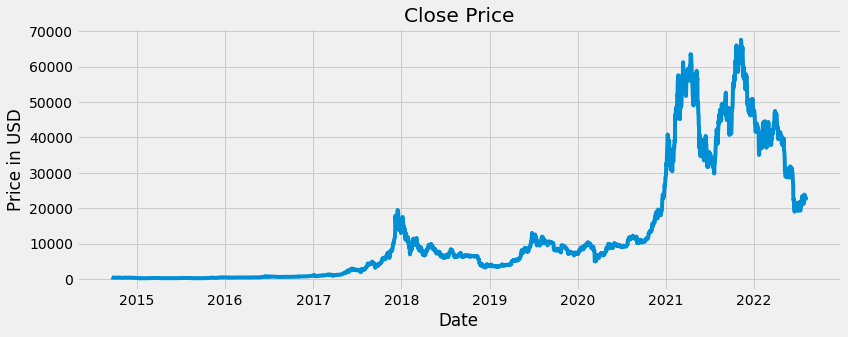

In [6]:
#Create and plot the graph 
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index, df['Close'], label='Close')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [7]:
#Calculate the RSI 
delta = df['Close'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[ up < 0] = 0 
down[ down > 0 ] = 0
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs( down.rolling(window=time_period).mean() )
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0/ (1.0 + RS))

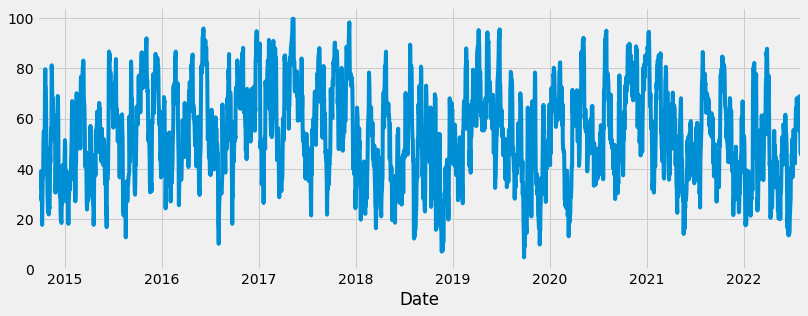

In [8]:
#Plot the RSI 
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

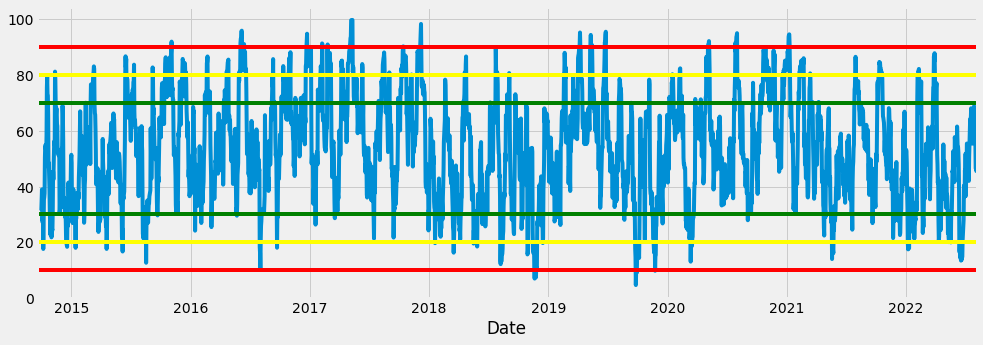

In [9]:
#Plot the RSI with overbought and oversold RSI lines/ levels 
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax0 = RSI.plot(ax=ax)
ax0.axhline(30, color='green')
ax0.axhline(70, color='green')
ax0.axhline(20, color='yellow')
ax0.axhline(80, color='yellow')
ax0.axhline(10, color='red')
ax0.axhline(90, color='red')

